<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>Analysis on Online Retail Dataset<b></center>

In [ ]:
'''EDA
(4'. Sec Data Acq)
1. Introduction - just enough - 3 paras + 3 images.
2. Problem statement - Objective (mathematical) - measurable MIN/MAX
3. import libs/ system ready/excel - logistics
4. Data Acq - primary and sec
5. Pre profiling - check if there are any issues
 - outlier - BOXplot, describe
 - duplicates - .duplicated()
 - misssing values - .info()
 - inconstancy in dtypes - know what the type should be, info can see what it actually is.
 - typos - check for value_counts() or unique()
 - format - check by unique
6. pre processing
 - outlier - drop - dependent of the objective - contextual
 - duplicates - .drop_duplicates() - contextual
 - misssing values - fillna(mean/median/mode) or delete the row/column.
 - inconstancy in dtypes - .astype()
 - typos - replace
 - format - replace
 7. Post profiling - trust but verify
 8. EDA - asking relevatn qss - 15 +-5.
 9. Conclude - Action - PREP - point reason example point.

'''

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Recently, it has been recognized that **precision marketing** has become a key means of generating profit.

- The availability of customer data and transaction records provides better understanding of customers’ **buying behaviors** and **preferences**.

- In the increasingly **competitive environment**, enterprises have to create a decision-making model for precision marketing.

<center><img width=50% src="https://image.freepik.com/free-vector/digital-marketing-advertising-infographic-white-background_18591-6516.jpg"></center>

- The case study considers a **marketing problem** where an online retailer provides different all-occasion gift products.

- This case study demonstrates that our **proposed decisions** and insights are capable of providing a good **precision marketing strategy**.

- The real-world data from a company in UK were collected and used in this case study to illustrate how to implement EDA.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The E-Shop** is an online retail company based in the **United Kingdom** (UK) that sells **unique all-occasion gifts**.

- They track online **traffic** on their website from **several countries** along with the UK on daily basis.

- In 2011, they observed a **hike in online traffic** at their e-retail shop.

- They plan to <font color="red">**segment customers**</font> and <font color="red">**target**</font> them with <font color="red">**advertisements**</font> based on their past purchases.

- They have hired a data scientist to guide them with the task. Let's say you are the data scientist they have approached.

- You have to analyze their **transactional data** from December 2010 to December 2011.

- You have to present an **initial investigation** on this data to check for various patterns, unusual transactions, cancellations, and bulk orders.

- This would be a **leading step** to help the company form proper customer segments.



---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         # A package that is required by pandas-profiling library
!pip install -q pandas-profiling                                    # A library to generate basic statistics about data

     |████████████████████████████████| 71kB 6.3MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure **not to execute** the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 256kB 27.2MB/s 
     |████████████████████████████████| 3.1MB 31.9MB/s 
     |████████████████████████████████| 1.1MB 36.7MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 112kB 41.1MB/s 
     |████████████████████████████████| 645kB 33.8MB/s 
     |████████████████████████████████| 10.1MB 32.8MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 296kB 53.2MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.


<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of information about the customers, transactions, and products of an online retail site.

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 541909 | 8 | 22.6 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| InvoiceNo | A 6-digit number uniquely assigned to each transaction. 'C' in the beginning indicates a Cancellation |
|2|StockCode | Product Code, a 5-digit number uniquely assigned to each distinct product |
|3| Description |	Product (item) Name |
|4| Quantity |	The quantities of each product (item) per transaction |
|5| InvoiceDate |	The day and time when each transaction was generated |
|6| UnitPrice |	Product price per unit in Sterling |
|7| CustomerID |	A 5-digit number uniquely assigned to each customer |
|8| Country |	The name of the country where each customer resides |

In [2]:
data = pd.read_excel(io='https://github.com/insaid2018/Term-1/blob/master/Data/Casestudy/online_retail.xlsx?raw=true')
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
'''
1. missing values in Description - delete the column
2. cust id - float - type casting to object
3. cust id missing - replace with ('guest') #every guest just visits onces
'''

"\n1. missing values in Description - delete the column\n2. cust id - float - type casting to object\n3. cust id missing - replace with ('guest' + invoice_no) #every guest just visits onces\n"

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
'''
1. Quantity - there are outliers, we can study their validity.
2. unit price - negative - study, absolute value.
3. unit price - outliers - study, drop is needed.
'''

In [7]:
# 1.missng value in description
# delete

data.drop('Description', axis = 1, inplace = True)

In [8]:
data['CustomerID'] = data['CustomerID'].fillna(0)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [49]:
# 2. cust id - float - type casting to object

data['CustomerID'] = data['CustomerID'].astype(int).astype('str')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  object        
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [10]:
data['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [11]:
'deepsh' + 'wadhwani'

'deepshwadhwani'

In [41]:
#'guest_' + data['InvoiceNo'].astype('str')

0         guest_536365
1         guest_536365
2         guest_536365
3         guest_536365
4         guest_536365
              ...     
541904    guest_581587
541905    guest_581587
541906    guest_581587
541907    guest_581587
541908    guest_581587
Name: InvoiceNo, Length: 541909, dtype: object

In [56]:
#data[data['CustomerID']==0]['CustomerID'] = 'guest_' + data[data['CustomerID']==0]['InvoiceNo'].astype('str')

In [57]:
#data[data['CustomerID'].str[0]=='g']

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [12]:
data['CustomerID'].sort_values()

437603        0.0
261044        0.0
261045        0.0
261046        0.0
261047        0.0
           ...   
198739    18287.0
198738    18287.0
198737    18287.0
198743    18287.0
392725    18287.0
Name: CustomerID, Length: 541909, dtype: float64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  object        
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [13]:
# 4. Quantity - there are outliers, we can study their validity.

data['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [62]:
IQR = data.Quantity.describe()['75%'] - data.Quantity.describe()['25%']

low_range = data.Quantity.describe()['25%'] - 1.5*IQR
high_range = data.Quantity.describe()['75%'] + 1.5*IQR

print('Low range  : {} '.format(low_range))
print('High range : {} '.format(high_range))


Low range  : -12.5 
High range : 23.5 


In [14]:
data = data[(data['Quantity']< 5000) | (data['Quantity']> -5000)]


In [ ]:
'''
7. a new feature can be created = returned / expired / outgo
8. duplicates
'''

In [ ]:
data['CustomerID'] = 'Gust_'.map(str) + data['InvoiceNo'].map(str)


**Observations:**

- We can see the description of only three continuous features - **Quantity**,	**UnitPrice**, and	**CustomerID**.

- The Quantity feature ranges from **-80995 to 80995 units** per transaction.

- The **midspread** (middle 50%) of the feature ranges from **1 unit** to **10 units** per transaction.

- The **UnitPrice** feature ranges from **-11062.06 to 38970 Sterling**. We will have to deal with the **negative price values**.

- The **midspread** (middle 50%) of the feature ranges from **1.25 Sterling to 4.13 Sterling**. 

- Looking at the maximum value of the feature, we can see that either some products are **priced very high** or it may be misinformation.

- **CustomerID** feature is an **identifier** so we won't be making any statistical observations for it. 

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   541909 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 33.1+ MB


**Observations:**

- There are **8 features** with **5,41,908 observations**.

- **Quantity** is of **int64** datatype.

- **UnitPrice** and **CustomerID** are of **float64** datatype.

- **InvoiceDate** is of **datetime64[ns]** datatype.

- **InvoiceNo**, **StockCode**, **Description**, and **Country** are of **object** datatypes

- We will have to make more sense of InvoiceNo and StockCode by exploring them further.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [16]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- There are **8 features** with **5,41,909 observations** in the dataset.

- **1,36,534 (3.1%) cells** have **missing** values.

- Most of the missing values are from the **CustomerID** feature and the rest belong to the **Description** feature.

- **CustomerID** feature has **24.9% of cells missing**.

- Dataset has **76,627 (14.1%) duplicate rows**.

- **Country** and **CustomerID** are highly **correlated** to each other.

- The **UnitPrice** feature is **positively skewed**.

- It also contains **2 negative values** and **2515 (0.5%) zeros**.

- InvoiceNo, StockCode, and Description seem to have unsupported data types.

- The dataset has **4372 unique customers** and **3684 unique products**.

- The **UK** has the **highest amount of customers** followed by Germany, France, and 34 more countries.

<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- We will simply **drop** the **rows** that contain **missing** values.

- We will also extract **year**, **month**, **hour** and **day of the week** of the transactions.

In [17]:
# We will start by first removing the duplicate rows
data.drop_duplicates(inplace=True)

# Dropping rows containing missing values
data.dropna(inplace=True)

# Checking for missing values again
data.isna().sum()

# Extracting Year, Month, Day and Hour for every transaction
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['hour'] = data['InvoiceDate'].dt.hour

# We get Monday = 0 to Sunday = 6 when we convert to day of the week.
# We will add +1 to every day of week so we can get Monday = 1 to Sunday = 7
data['day'] = (data['InvoiceDate'].dt.dayofweek) + 1

data["Revenue"] = data["Quantity"] * data["UnitPrice"]

data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,3,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,3,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34


<a name = Section7></a>

---
# **7. Data Post-Profiling**
---

- In this section, we will observe the changes after performing data pre-processing, if present.

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Post Profiling Report.html')
# print('Accomplished!')

**Observations**:

- There are **no missing values** in the dataset.

- There are **no duplicate values** in the dataset.

- **Description** feature shows **high cardinality**.

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

In [18]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,3,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,3,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,3,20.34


In [ ]:
'''
15+-5 relevant questions

asking question is not easy:
1. Relevence
2. Reasonable answering the question. - RESONABLY 
3. Vague while asking question. - SPECIFIC
'''

In [ ]:
'''
UNI - BI - MULTI strategy (n columns)

UNI - one variable at a time -  n questions

BI - two variables at a time - nC2 = (n2-n)/2

MULTI - > two variable at a time - 2n - 1 - n - (n2-n)/2
--------------------------------------------------------------
TOTAL -                           nC1 + nC2 ... + nCn = (2n - 1)



'''

**<h4>Question:** How to cerify for cancelled transactions?</h4>

- According to Section 4, feature descreption table, a cancelled transaction can be identified if the InvoiceNo begins with a 'C'

In [ ]:
# Putting cancelled orders in a different dataframe for easier analysis
cancelled_orders = data[data['InvoiceNo'].astype(str).str.startswith('C')]

print('Total number of cancelled orders:',cancelled_orders.shape[0])
cancelled_orders.head()

Total number of cancelled orders: 8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50000,14527.00000,United Kingdom,2010,12,9,3,-27.50000
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65000,15311.00000,United Kingdom,2010,12,9,3,-4.65000
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65000,17548.00000,United Kingdom,2010,12,10,3,-19.80000
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29000,17548.00000,United Kingdom,2010,12,10,3,-6.96000
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29000,17548.00000,United Kingdom,2010,12,10,3,-6.96000


**Observations**:

- There are **8872 cancelled transactions** in the dataset.

- We can hypothesize that the Quantity column corresponding to the cancelled orders are shown as negative values.

**<h4>Question:** Does the Quantity feature consists of negative values for cancelled orders?</h4>

In [ ]:
cancelled_orders[cancelled_orders['Quantity']>=0].shape

(0, 13)

**Observations**:

- Our assumption seems true.

- We will **cross-check** this by **checking negative values** in Quantity feature in the entire dataset for **invoice numbers** that **don't start** with '**C**'.

In [ ]:
data[(data['Quantity']<0) & (data['InvoiceNo'] != data['InvoiceNo'].astype(str).str.startswith('C'))].shape

(8872, 13)

**Observations**:

- We can conclude that a **negative value** in the **quantity** feature **indicates** a **cancelled order**.

**<h4>Question**: How many total orders have been made?</h4>

In [ ]:
total = data['InvoiceNo'].nunique()
total

22190

**Observations**: There have been **22190 unique orders** made on the retail site.

**<h4>Question:** What is the proportion of cancelled transactions from total number of transactions?</h4>

In [ ]:
cancelled = cancelled_orders['InvoiceNo'].nunique()
print('Proportion of cancelled orders is: ' + str(cancelled*100/total) + '%')

Proportion of cancelled orders is: 16.466876971608833%


**Observations:** Overall **16.46% orders** have been cancelled.

**<h4>Question :** What is the average number of orders placed per customer?</h4>

In [ ]:
groupby_customers = pd.DataFrame(data.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.00000,2
12347.00000,7
12348.00000,4
12349.00000,1
12350.00000,1


In [ ]:
groupby_customers.describe()

,InvoiceNo
count,4372.00000
mean,5.07548
std,9.33875
min,1.00000
25%,1.00000
50%,3.00000
75%,5.00000
max,248.00000


**Observations:**

- At an average, every customer has placed around 5 orders on the website.

- We will examine further how products are purchased.

**Question:** What's the average number of unique items per order?

In [ ]:
groupby_invoice = pd.DataFrame(data.groupby(['InvoiceNo'])['StockCode'].nunique())
groupby_invoice.columns = ['Items']
groupby_invoice.head()

,Items
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [ ]:
groupby_invoice.describe()

,Items
count,22190.00000
mean,17.87657
std,22.87261
min,1.00000
25%,3.00000
50%,12.00000
75%,24.00000
max,541.00000


**Observations:**

- The **average** number of **unique items per order** are around **17**.

- **Majority** orders involve **less than 25** unique items.

- But some orders can have **high amount** of unique items by as much as **541 items**.

**<h4>Question:** How many products does a customer buy on an average?</h4>

In [ ]:
temp_df = data.groupby(['CustomerID'], as_index=False)['Quantity'].sum()
transaction_df = temp_df.rename(columns = {'Quantity':'Number of Products'})
transaction_df.head()

,CustomerID,Number of Products
0,12346.00000,0
1,12347.00000,2458
2,12348.00000,2341
3,12349.00000,631
4,12350.00000,197


**Observations:**

- The **zero average value** indicates that the particular customer has returned all the ordered items back.

- Let's see a description of this data.

In [ ]:
transaction_df.describe()

,CustomerID,Number of Products
count,4372.00000,4372.00000
mean,15299.67772,1119.13335
std,1722.39071,4672.99571
min,12346.00000,-303.00000
25%,13812.75000,151.75000
50%,15300.50000,364.00000
75%,16778.25000,956.25000
max,18287.00000,196719.00000


- **Mean** amount of products are **1119 products per customer**.

- Looks like a **lot of customers** could be **wholesale businesses** and thus are **buying** the gift items in a **bulk**.

- There is a negative value in the description. The number of **returns** should be **equal** to the number of **purchases**.

- Let's see what does this value mean.

In [ ]:
transaction_df[transaction_df['Number of Products']==transaction_df['Number of Products'].min()]

,CustomerID,Number of Products
3103,16546.00000,-303


In [ ]:
data[data['CustomerID']==16546]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
3721,536663,22867,HAND WARMER BIRD DESIGN,24,2010-12-02 12:07:00,2.10000,16546.00000,United Kingdom,2010,12,12,4,50.40000
3722,536663,22633,HAND WARMER UNION JACK,24,2010-12-02 12:07:00,2.10000,16546.00000,United Kingdom,2010,12,12,4,50.40000
3723,536663,22632,HAND WARMER RED RETROSPOT,24,2010-12-02 12:07:00,2.10000,16546.00000,United Kingdom,2010,12,12,4,50.40000
3724,536663,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,40,2010-12-02 12:07:00,2.55000,16546.00000,United Kingdom,2010,12,12,4,102.00000
3725,536663,22737,RIBBON REEL CHRISTMAS PRESENT,20,2010-12-02 12:07:00,1.65000,16546.00000,United Kingdom,2010,12,12,4,33.00000
3726,536663,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-02 12:07:00,0.55000,16546.00000,United Kingdom,2010,12,12,4,13.20000
4853,C536812,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-36,2010-12-02 16:58:00,0.85000,16546.00000,United Kingdom,2010,12,16,4,-30.60000
4854,C536812,22574,HEART WOODEN CHRISTMAS DECORATION,-192,2010-12-02 16:58:00,0.72000,16546.00000,United Kingdom,2010,12,16,4,-138.24000
4855,C536812,22593,CHRISTMAS GINGHAM STAR,-144,2010-12-02 16:58:00,0.72000,16546.00000,United Kingdom,2010,12,16,4,-103.68000
4856,C536812,22595,CHRISTMAS GINGHAM HEART,-144,2010-12-02 16:58:00,0.72000,16546.00000,United Kingdom,2010,12,16,4,-103.68000


**Observations:**

- There are a lot of purchases and returns made by CustomerID=16546.

- According to this information, they have **returned more** products than they have **purchased**.

- There seems to be some **information loss** since we had to drop a lot of rows with missing CustomerIds.

- There must be many other transactions that report total number of products purchased per customer as negative (or returned).

In [ ]:
transaction_df[transaction_df['Number of Products']<0].shape[0]

40

**Observations:**

- There are in all **40 such customers** whose total purchases report more returns than purchases.

**<h4>Question:** What is the total revenue generated by the online retailer?</h4>

In [ ]:
data["Revenue"] = data["Quantity"] * data["UnitPrice"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,2010,12,8,3,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,2010,12,8,3,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000


In [ ]:
print('Total revenue generated by the online retailer is:', round(data['Revenue'].sum(), 2))

Total revenue generated by the online retailer is: 8278519.42


**Observations:**

- **8.27 million Sterling** is the **total revenue** generated by the online retailer.

**<h4>Question:** What is the average revenue generated per customer?</h4>

In [ ]:
avg_revenue = pd.DataFrame(data.groupby('CustomerID')['Revenue'].mean())
avg_revenue.columns = ['Average Revenue']
avg_revenue.head()

,Average Revenue
CustomerID,
12346.00000,0.00000
12347.00000,23.68132
12348.00000,57.97548
12349.00000,24.07603
12350.00000,19.67059


In [ ]:
avg_revenue.describe()

,Average Revenue
count,4372.00000
mean,28.86839
std,127.32472
min,-4287.63000
25%,11.06662
50%,16.94102
75%,23.58143
max,3861.00000


**Observations:**

- An average of **29 Sterling** is generated per customer.

- Some customers also generate an average revenue of **over 3800 Sterling**.

**<h4>Question:** What is the total revenue generated by each country?</h4>

In [ ]:
country_revenue = pd.DataFrame(data.groupby(by='Country', as_index=False)['Revenue'].sum().sort_values(by='Revenue', ascending = False))
country_revenue.head()

,Country,Revenue
35,United Kingdom,6747156.15400
23,Netherlands,284661.54000
10,EIRE,250001.78000
14,Germany,221509.47000
13,France,196626.05000


**Observations:**

- The **UK** is in the **top** when it comes to generating **revenue**.

- It makes sense as the **company** is **based** in the **UK** and must have a **lot of traffic** from the UK itself.

- Let's see the distribution of **total revenue** generated by other countries **outside the UK**

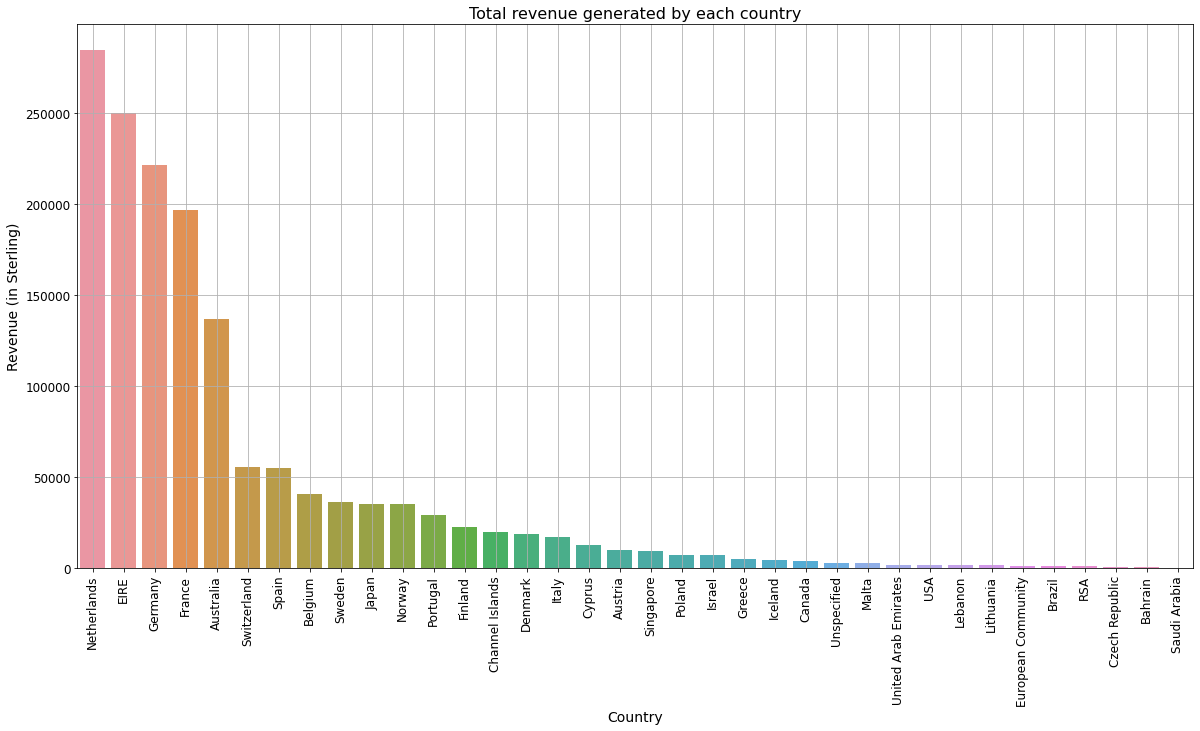

In [ ]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(20, 10))

# Creating a barplot for country vs revenue
sns.barplot(x=country_revenue['Country'][1:], y=country_revenue['Revenue'][1:])

# Adding Cosmetics
plt.xlabel(xlabel='Country', fontsize=14)
plt.ylabel(ylabel='Revenue (in Sterling)', fontsize=14)
plt.title(label='Total revenue generated by each country', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations:**

<a name = #Bar1></a>

- **Netherlands** and **EIRE**(Ireland) see a lot of traffic on the website.

- This is followed by **Germany**, **France** and **Australia** where all of these countries **generate** more than **100000 Sterling**.

**<h4>Question:** What is the customer distribution across each country?</h4>

In [ ]:
# We will count the unique number of CustomerIDs across each country
country_customers = pd.DataFrame(data.groupby(by='Country', as_index=False)['CustomerID'].nunique())
country_customers.rename(columns={'CustomerID': 'No. of Customers'}, inplace=True)
country_customers.sort_values(by=['No. of Customers'], ascending = False, inplace=True)
country_customers.head()

,Country,No. of Customers
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


**Observations:**

- The **UK** has **3950 unique customers** out of the 4372 total customers who have ordered from the website.

- **Germany** and **France** follow the UK but the **number of customers** is **less than 100** across each country.



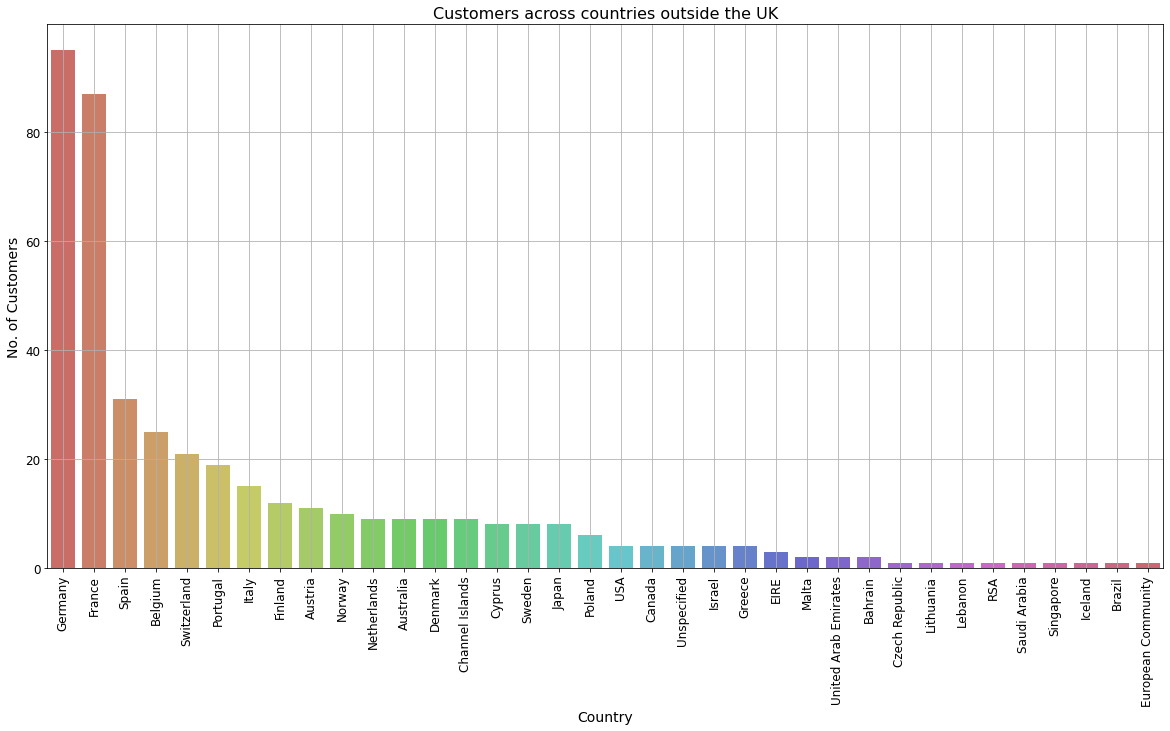

In [ ]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(20, 10))

# Creating a barplot for country vs revenue
sns.barplot(x=country_customers['Country'][1:], y=country_customers['No. of Customers'][1:], palette='hls')

# Adding Cosmetics
plt.xlabel(xlabel='Country', fontsize=14)
plt.ylabel(ylabel='No. of Customers', fontsize=14)
plt.title(label='Customers across countries outside the UK', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations:**

- **Germany** sees the **most amount** of customers on the website after the UK.

- But those customers **don't buy in bulk** or expensive products as the revenue generated by them is 3rd highest across the foreign countries.

- **Netherlands**, even though has **less customers**, brings in a lot of revenue as can be seen by the above bar plots.

**<h4>Question:** What is the total revenue generated per month?</h4>

In [ ]:
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: str(date.year) + '-' + str(date.month))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,2010,12,8,3,15.30000,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,2010,12,8,3,22.00000,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000,2010-12


In [ ]:
df_revenue = data.groupby(['InvoiceYearMonth']).agg({'Revenue': sum}).reset_index().sort_values(by=['Revenue'], ascending = False)
df_revenue.head()

,InvoiceYearMonth,Revenue
3,2011-11,1126815.07000
2,2011-10,973306.38000
12,2011-9,929356.23200
8,2011-5,647011.67000
11,2011-8,615078.09000


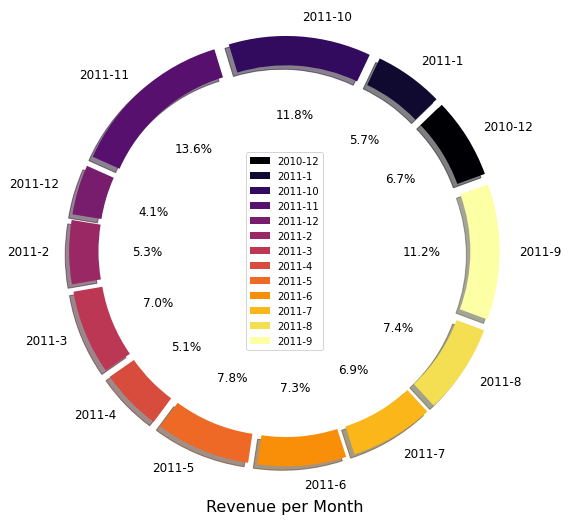

In [ ]:
# Creating a pie plot for revenue per month
df_revenue.groupby(['InvoiceYearMonth'])['Revenue'].mean().plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(13)/10,
                                                                figsize=(9, 9),
                                                                fontsize=12, 
                                                                startangle=20,
                                                                shadow=True,
                                                                cmap='inferno',
                                                                legend=True,
                                                                label='')

# Adding some cosmetics
plt.xlabel(xlabel='Revenue per Month', fontsize=16)

# Display the output
plt.show()

**Observations:**

- **October**, **November** and **December** saw the **most** amount of orders on the website.

- These months come under the **holiday season** in the UK.

- It makes sense that people gift each other a lot during the holiday season festivals like **Haloween**, **Thanksgiving** and **Christmas**.

**<h4>Question:** How many orders have been placed at each hour of a day?</h4>

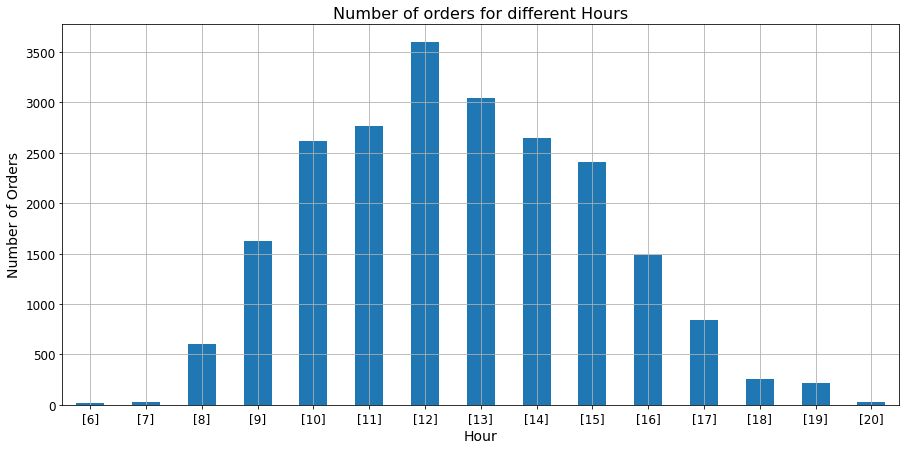

In [ ]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(15,7))

# Create a bar plot
hour_data = data.groupby('InvoiceNo')['hour'].unique()
hour_data.value_counts().iloc[:-1].sort_index().plot(kind='bar')

# Adding Cosmetics
plt.xlabel(xlabel='Hour', fontsize=14)
plt.ylabel(ylabel='Number of Orders', fontsize=14)
plt.title(label='Number of orders for different Hours', fontsize=16)
plt.xticks(rotation='horizontal', fontsize=12)
#plt.xticks(labels=range(6, 21), rotation='horizontal', fontsize=12)
plt.yticks(ticks=range(0, 4000, 500), fontsize=12)
plt.grid(b=True)

# Displaying the plot
plt.show()

**Observations:**

- We can observe that most of the orders are placed after **8:00 AM till 8:00 PM** London Time.

- The **highest amount** of orders are placed around **12:00 PM** London Time.


**<h4>Question:** What is the frequency of orders for weekdays?</h4>

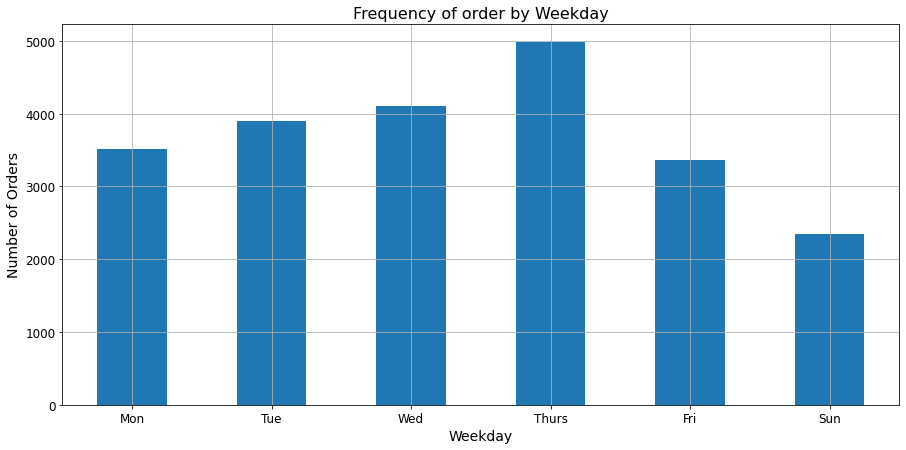

In [ ]:
fig = plt.figure(figsize=(15,7))

# Create a bar plot
week_data = data.groupby(['InvoiceNo'])['day'].unique()
week_data.value_counts().sort_index().plot.bar()

# Adding Cosmetics
plt.xlabel('Weekday',fontsize=14)
plt.ylabel('Number of Orders',fontsize=14)
plt.title("Frequency of order by Weekday", fontsize=16)
plt.xticks(ticks=[[0], [1], [2], [3], [4], [5]],
           labels=['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sun'],
           rotation='horizontal',
           fontsize=12)
plt.yticks(ticks=range(0, 5500, 1000), fontsize=12)
plt.grid(b=True)

# Displaying the plot
plt.show()

**Observations:**

- There are **no orders** that were placed on **Saturday**.

- **Most** of the orders are placed on **Thursday** followed by **Wednesdays** and **Tuesdays**.

- Orders are placed the **least** on **weekends**.

**<h4>Question:** What is the frequency of orders for weekdays vs hours per day?</h4>

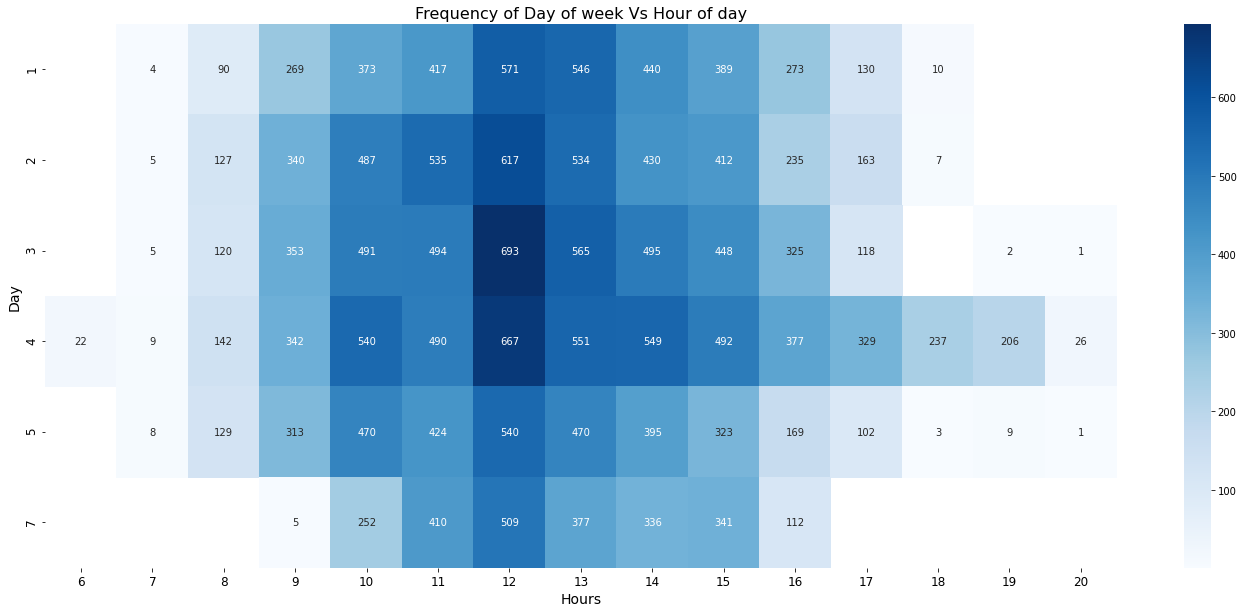

In [ ]:
plt.figure(figsize=(24, 10))

# Creating a group and sorting unique values for invoice numbers
grouped_df  = data.groupby(["day", "hour"])["InvoiceNo"].unique().reset_index()

# Calculating number of orders for every hour of every day
grouped_df["number_of_orders"] = grouped_df["InvoiceNo"].apply(len)

# Creating a pivot table from the grouped_df
grouped_df = grouped_df.pivot('day', 'hour', 'number_of_orders')

# Create a heatmap
sns.heatmap(data=grouped_df, annot=True, cmap='Blues', fmt='g')

# Adding some cosmetics
plt.title(label="Frequency of Day of week Vs Hour of day", fontsize=16, y=1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Hours', fontsize=14)
plt.ylabel(ylabel='Day', fontsize=14)
#plt.grid(b=True)

# Display the heatmap
plt.show()

**Observations:**

- Majority number of orders have been placed at **noon** time of **Wednesdays** and followed by the same time on **Thursdays**.

- We can see orders are placed at **every hour** on **Thursdays**.

- Most of the orders are placed from **Tuesdays** to **Fridays** from **10:00 AM** to **1:00 PM** London Time.

**<h4>Question:** Assuming UnitPrice=0 means free items, how many free items have been given away?</h4>

In [ ]:
free = data[data['UnitPrice'] == 0]
free.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue,InvoiceYearMonth
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.00000,12647.00000,Germany,2010,12,14,7,0.00000,2010-12
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.00000,16560.00000,United Kingdom,2010,12,14,4,0.00000,2010-12
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.00000,14911.00000,EIRE,2010,12,13,2,0.00000,2010-12
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.00000,13081.00000,United Kingdom,2011,1,16,4,0.00000,2011-1
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.00000,13081.00000,United Kingdom,2011,1,16,4,0.00000,2011-1


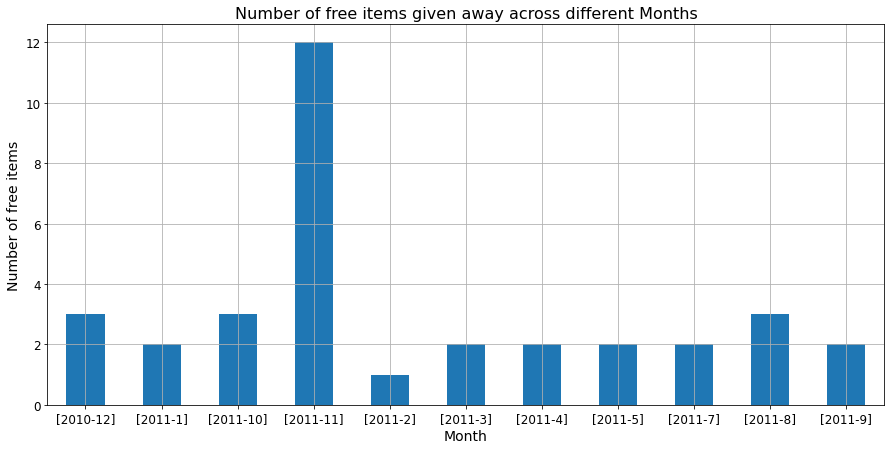

In [ ]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(15,7))

# Create a bar plot by:
# Grouping data by InvoiceNo
# Calculating unique months in the groupby object and taking their counts
# Sorting their index and plotting

free_month_data = free.groupby('InvoiceNo')['InvoiceYearMonth'].unique()
free_month_data.value_counts().sort_index().plot(kind='bar')

# Adding Cosmetics
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of free items', fontsize=14)
plt.title('Number of free items given away across different Months', fontsize=16)
plt.xticks(rotation='horizontal',
           fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)

# Displaying the plot
plt.show()

**Observations:**

- A lot of free items have been given away in **November**.

- Free items given away are almost in same quantity (**2-3 items per month**) for other months.

- There were **no items** given away in the month of **June**.

**<h4>Question:** What is the average revenue per order?</h4>

In [ ]:
avg_revenue_per_order = data.groupby('InvoiceNo')['Revenue'].mean().reset_index()
avg_revenue_per_order.head()

,InvoiceNo,Revenue
0,536365,19.87429
1,536366,11.10000
2,536367,23.22750
3,536368,17.51250
4,536369,17.85000


In [ ]:
avg_revenue_per_order.describe()

,Revenue
count,22190.00000
mean,34.38573
std,1809.76532
min,-168469.60000
25%,5.95881
50%,16.75605
75%,27.21063
max,168469.60000


**Observation:**

- The average revenue per order is **34.39 Sterling** for the online retailer.

**<h4>Question:** What is the total monthly revenue in UK?</h4>

In [ ]:
df_uk = data.query("Country == 'United Kingdom'").reset_index(drop=True)

In [ ]:
df_monthly_revenue = df_uk.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
df_monthly_revenue

,InvoiceYearMonth,Revenue
3,2011-11,950731.45000
2,2011-10,781610.92000
12,2011-9,774620.30200
8,2011-5,524363.88000
0,2010-12,481675.23000
11,2011-8,475752.95000
9,2011-6,471386.36000
10,2011-7,460082.89100
6,2011-3,455534.07000
7,2011-4,375919.23100


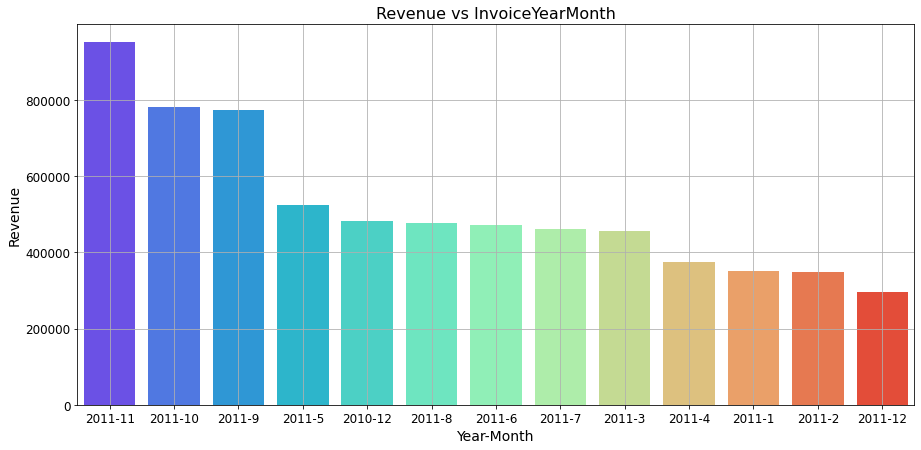

In [ ]:
plt.figure(figsize=(15,7))

# Plot a barplot for month vs revenue for the UK
sns.barplot(data=df_monthly_revenue, x='InvoiceYearMonth', y='Revenue', palette='rainbow')

# Adding some cosmetics
plt.xlabel(xlabel='Year-Month', fontsize=14)
plt.ylabel(ylabel='Revenue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Revenue vs InvoiceYearMonth', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations:**

- **November** saw the highest amount of sales in the UK followed by **October**, **September**, and **May** months.

**<h4>Question:** Which products are most bought in UK?</h4>

In [ ]:
groupedProduct = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
top_10_products = groupedProduct.head(10)
top_10_products

,StockCode,Description,Quantity
2694,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,47886
3562,85099B,JUMBO BAG RED RETROSPOT,40777
2800,84879,ASSORTED COLOUR BIRD ORNAMENT,32580
3569,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32079
1032,22197,POPCORN HOLDER,28550
1427,22616,PACK OF 12 LONDON TISSUES,24297
37,17003,BROCADE RING PURSE,22672
356,21212,PACK OF 72 RETROSPOT CAKE CASES,22182
1012,22178,VICTORIAN GLASS HANGING T-LIGHT,21427
851,21977,PACK OF 60 PINK PAISLEY CAKE CASES,19882


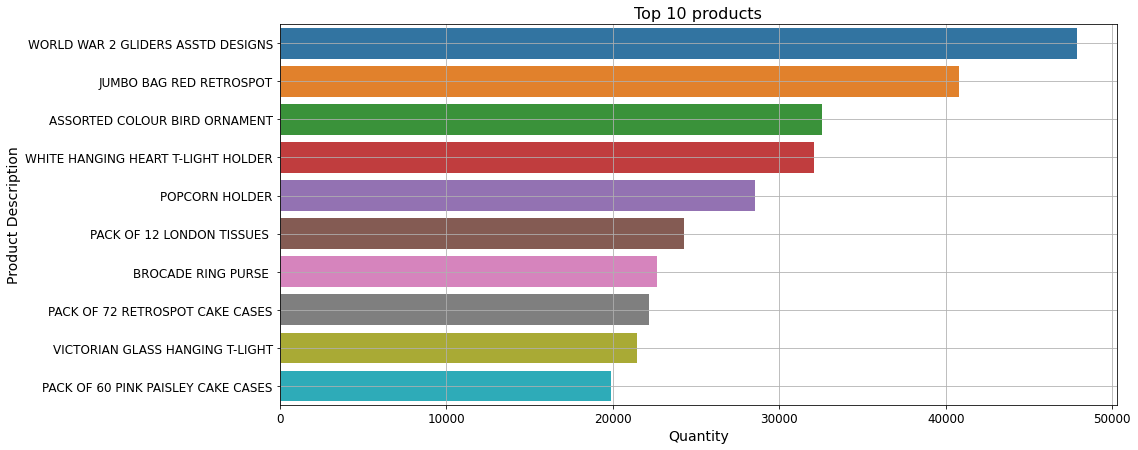

In [ ]:
# Create a figure of 15 x 7 inches
plt.figure(figsize=(15,7))

# Plot a bar plot for top 10 Product names and their quantities
sns.barplot(data=top_10_products, y='Description', x='Quantity')

# Adding some cosmetics
plt.ylabel(ylabel='Product Description', fontsize=14)
plt.xlabel(xlabel='Quantity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Top 10 products', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations:**

- **WORLD WAR 2 GLIDERS ASSTD DESIGNS** have been sold the most with **47886 units**.

- This product is **followed** by **JUMBO BAG RED RETROSPOT** and **ASSORTED COLOUR BIRD ORNAMENT**.

**<h4>Question:** How many customers were active in all the months in the UK?<h4>

In [ ]:
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

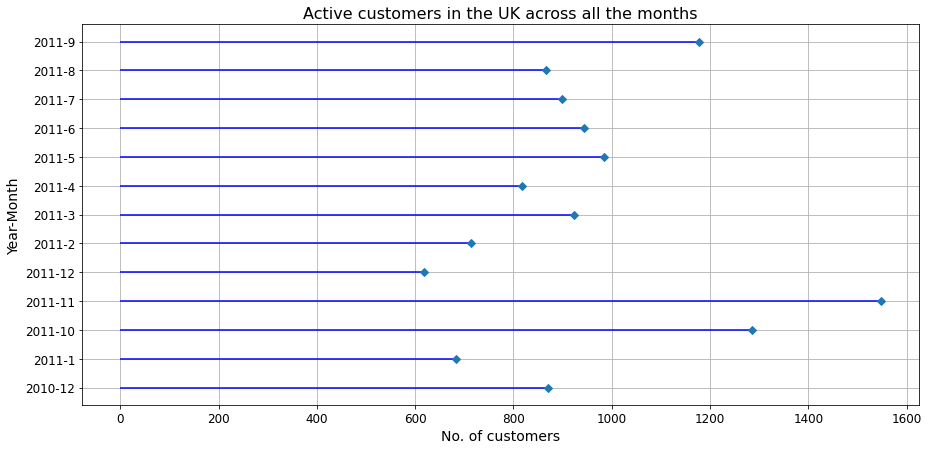

In [ ]:
# Create a figure of 15 x 7 inches
plt.figure(figsize=(15,7))

# Plot 
plt.hlines(df_monthly_active['InvoiceYearMonth'],xmin=0,xmax=df_monthly_active['CustomerID'],color='blue')
plt.plot(df_monthly_active['CustomerID'],df_monthly_active['InvoiceYearMonth'] , "D")

# Adding some cosmetics
plt.xlabel(xlabel='No. of customers', fontsize=14)
plt.ylabel(ylabel='Year-Month', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Active customers in the UK across all the months', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Observations:**

- **November** saw the **most** number of **active** customers in the UK with **1548 customers**.

- **September** and **October** too have a lot of active customers.

- This is more in **correspondence** to the huge **number** of **orders** placed in these months as well.

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- We almost have **16.46% cancelled orders** which is a slightly high number for an online retailer.

- **Studying** these **cancelled orders** further may help in preventing future cancellation.

- Let's first get an overview of the general customers purchase behavior and then dig deeper.

- The average **number of unique items per order** are **17**.

- The average revenue per order is **34.39 Sterling** for the online retailer.

- Not only **most sales revenues** are achieved in the **UK**, but also **most customers** are **located** there too.

- Netherlands seems like one of the **bulk buyers** as it has **less than 100 customers** yet brings in the most amount of revenue **outside** the **UK**.

<a name = Section92></a>
### **9.2 Actionable Insights**

- By analysing the data in this way, we can uncover **groups of customers** that behave in similar ways.

- **UK**, **Germany** and **Netherlands** should be the **primary targets** for advertisments.

- This level of **customer segmentation** is useful in marketing to these groups of customers appropriately.

- A **marketing campaign** that works for a group of customers that places **low value orders** frequently may not be appropriate for customers who place sporadic, **high value orders**.

- Make relevant **product recommendations** to the customers using **precision marketing**.

- Empower your customers to actively share their details, **make your customers part of the process**.

- Encourage them to share their **data** with you through **conversations**, **surveys**, and other **research methods**.

- Doing so not only help you get to know them better, but it also **builds trust**.

- It would be important to **talk with the e-commerce team to understand the business, customers, strategic and tactical objectives**.